In [1]:
import pandas as pd
import numpy as np
from preprocessing import DataProcessor
from utils_cluster import ClusterOptimizer
from utils_cluster import kmeans_cluster_plot

In [2]:
heroes_information = pd.read_csv("/Users/aurelianosancho/.cache/kagglehub/datasets/claudiodavi/superhero-set/versions/1/heroes_information.csv", index_col=0)
heroes_information = heroes_information.drop_duplicates(subset='name')
super_hero_powers = pd.read_csv("/Users/aurelianosancho/.cache/kagglehub/datasets/claudiodavi/superhero-set/versions/1/super_hero_powers.csv", index_col=0)
super_hero_powers.index.name = 'name'
super_hero_powers.reset_index(inplace=True)
df = heroes_information.merge(super_hero_powers, on='name', how='inner')

In [3]:
processor = DataProcessor(heroes_information)
processor.preprocessing()
processor.normalize_min_max()
cat_heroes_information = ['Gender', 'Eye color', 'Hair color', 'Publisher', 'Alignment']
cat_super_hero_powers = list(super_hero_powers.columns)
cat_super_hero_powers.remove('name')
cat_cols = cat_super_hero_powers + cat_heroes_information
processor.onehot_encode_columns(cat_heroes_information)
model_base = processor.df
model_base.set_index('name', inplace=True)
model_base.head(3)


,Height,Weight,Gender_Male,Gender_Unknown,Eye color_amber,Eye color_black,Eye color_blue,Eye color_blue / white,Eye color_brown,Eye color_gold,...,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Marvel Comics,Publisher_Shueisha,Publisher_Star Trek,Publisher_Team Epic TV,Publisher_Unknown,Alignment_bad,Alignment_good,Alignment_neutral
name,,,,,,,,,,,,,,,,,,,,,
Abe Sapien,0.750000,0.237705,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Abin Sur,0.625000,0.442623,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Absorbing Man,0.791667,0.704918,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


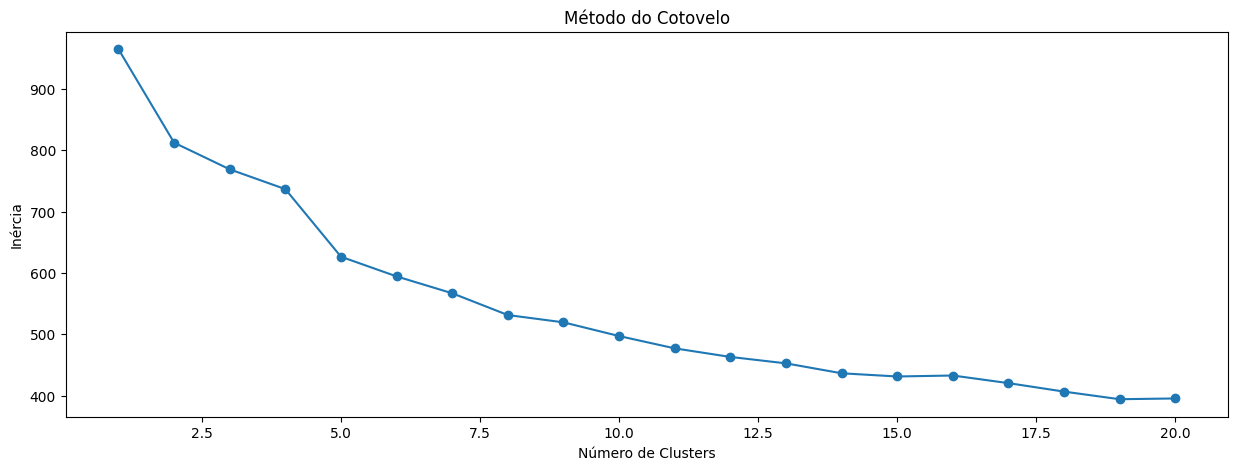

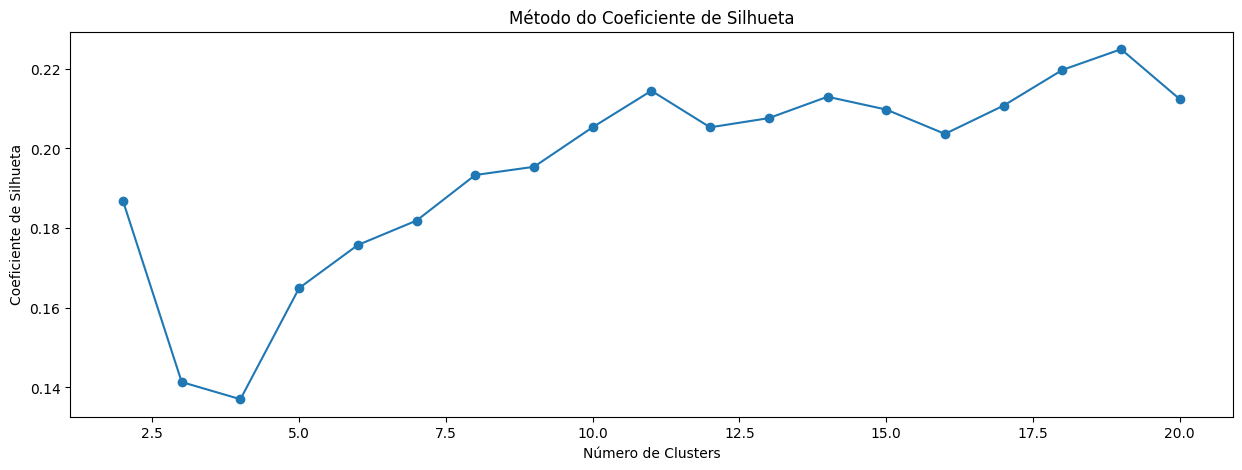

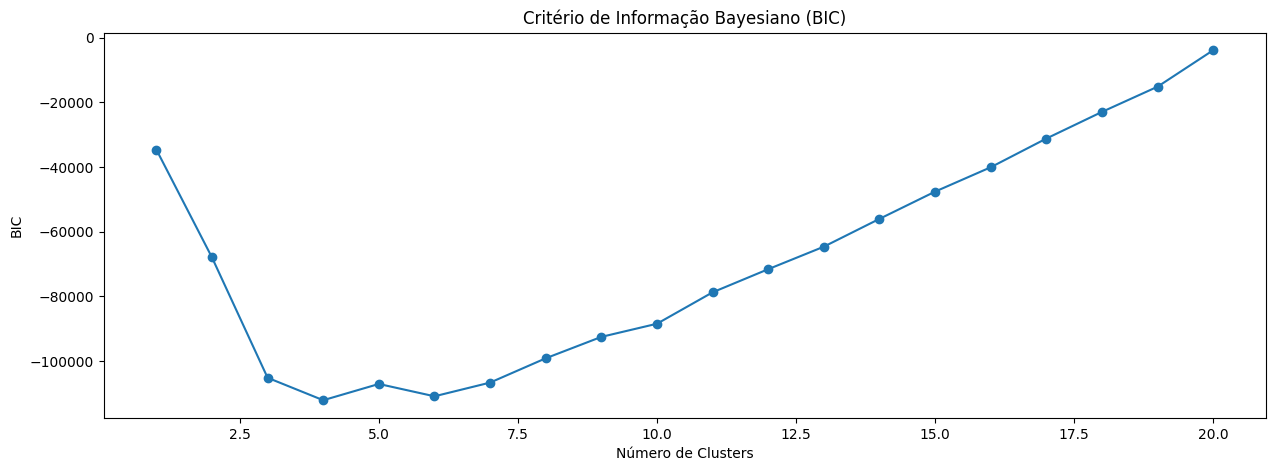

In [4]:
optimizer = ClusterOptimizer(model_base)

optimizer.elbow_method(max_clusters=20)

optimizer.silhouette_method(max_clusters=20)

optimizer.bic_gmm_method(max_clusters=20)

/Users/aurelianosancho/Dropbox/GitHub/Alelo/utils_cluster.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='viridis')


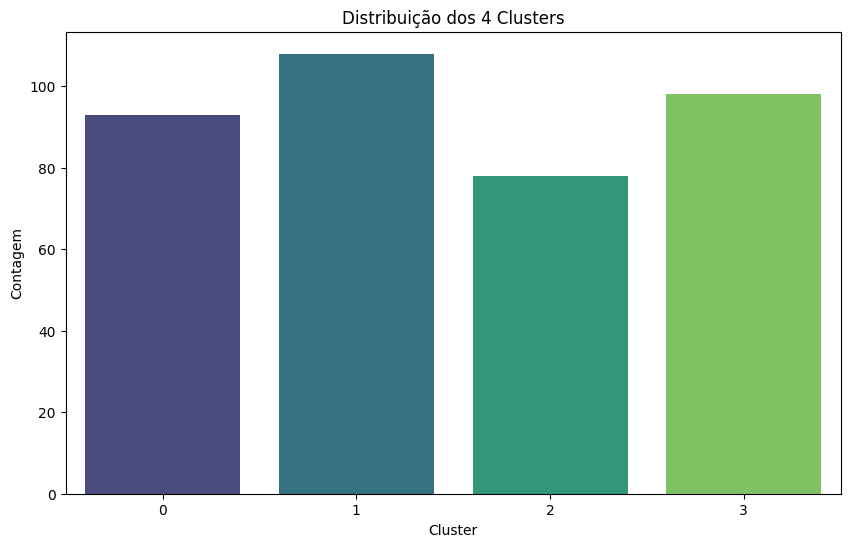

,Height,Weight,Gender_Male,Gender_Unknown,Eye color_amber,Eye color_black,Eye color_blue,Eye color_blue / white,Eye color_brown,Eye color_gold,...,Publisher_George Lucas,Publisher_Marvel Comics,Publisher_Shueisha,Publisher_Star Trek,Publisher_Team Epic TV,Publisher_Unknown,Alignment_bad,Alignment_good,Alignment_neutral,Cluster
name,,,,,,,,,,,,,,,,,,,,,
Abe Sapien,0.750000,0.237705,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
Abin Sur,0.625000,0.442623,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
Absorbing Man,0.791667,0.704918,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
Adam Strange,0.625000,0.426230,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
Agent 13,0.375000,0.204918,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellow Claw,0.687500,0.483607,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
Yellowjacket,0.583333,0.385246,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
Yellowjacket II,0.208333,0.131148,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [5]:
kmeans_cluster_plot(data=model_base, n_clusters=4)